# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
data["plot"] = True

data['min_llema_angle'] = 1

data['pl_move_trail_trigger']       = 0.0040
data['stop_loss_pip']               = -0.0040

data['angle_len']       = 250

data['take_profit_method']  = 'simple'
data['stop_loss_method']    = 'simple'

data['start_date'] = {'year':2021, 'month':3, 'date':1}
data['end_date']   = {'year':2021, 'month':3, 'date':31}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

100%|████████████████████████████▉| 1874257/1879406 [1:21:10<00:34, 147.52it/s]

pls    0.02545
dtype: float64
--------------------------------------
                   date ord_types  llema_angle               close_type  \
154 2021-03-29 14:00:07      long          1.0               sema_close   
155 2021-03-29 14:48:22     short         -1.0  simple_slema_move_close   
156 2021-03-29 16:16:35     short          0.0  simple_slema_move_close   
157 2021-03-30 00:27:32     short         -0.0  simple_slema_move_close   
158 2021-03-30 09:00:12     short         -2.0  simple_slema_move_close   
159 2021-03-30 12:11:00     short         -3.0  simple_slema_move_close   
160 2021-03-30 14:21:18     short         -4.0  simple_slema_move_close   
161 2021-03-30 23:49:14     short         -4.0  simple_slema_move_close   
162 2021-03-31 06:28:56     short         -3.0  simple_slema_move_close   
163 2021-03-31 08:58:24     short         -3.0               sema_close   
164 2021-03-31 12:10:45      long          1.0               sema_close   
165 2021-03-31 14:12:29     sho

100%|█████████████████████████████| 1879406/1879406 [1:21:10<00:00, 385.84it/s]

Wall time: 1h 21min 51s


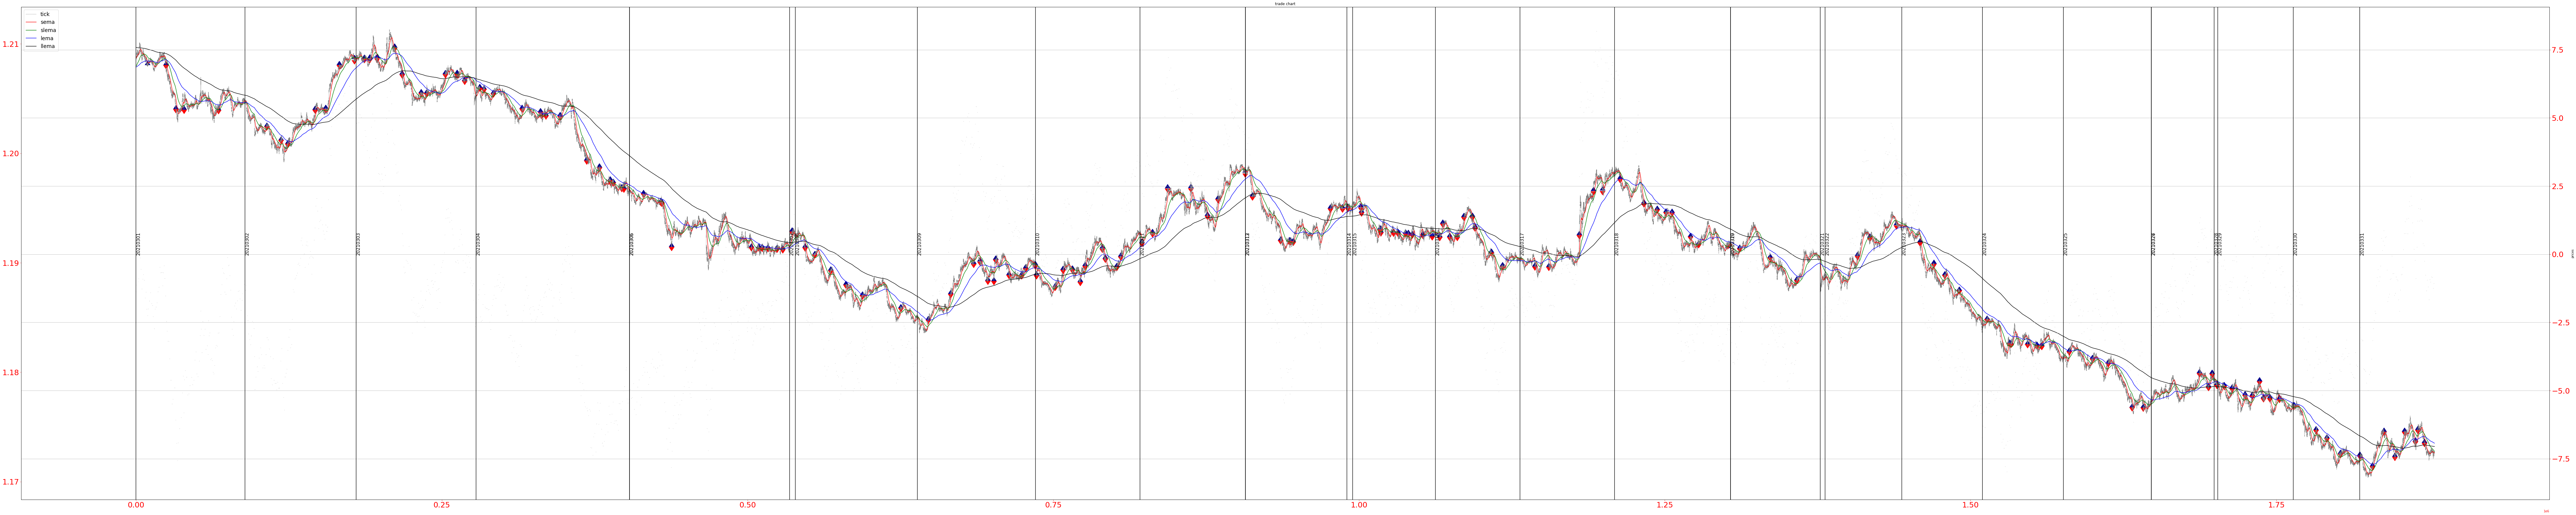

-----------------------------------------------------
date_val          : ['20210301', '20210302', '20210303', '20210304', '20210305', '20210306', '20210307', '20210308', '20210309', '20210310', '20210311', '20210312', '20210313', '20210314', '20210315', '20210316', '20210317', '20210318', '20210319', '20210320', '20210321', '20210322', '20210323', '20210324', '20210325', '20210326', '20210327', '20210328', '20210329', '20210330', '20210331']
Total PL : 0.02545
-------------
net_pl            : 0.02545/0.16707
-------------
+ve               : num= 127    sum= +0.09626    avg= +0.00076
-ve               : num= 42    sum= -0.07081    avg= -0.00169
-----------------------------------------------------
month_val
3    0.02545
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    119
sema_close                  42
simple_take_profit           8
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')